# PCA para el análisis y preprocesamiento de datos previo al entrenamiento de algoritmos de clasificación

## 1. Importar Datos
El archivo de entrada debe ser un archivo de texto plano con el formato siguiente:
```
No. Elementos
No. Atributos
No. Clases
atrib_0, atrib_1, ..., atrib_n, clase
atrib_0, atrib_1, ..., atrib_n, clase
... ... ...
atrib_0, atrib_1, ..., atrib_n, clase
```

### 1.1 Preprocesar archivo

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

nombre_archivo = "data"

In [84]:
try:
    with open( nombre_archivo + ".txt", "r") as archivo:
        nElem = int(archivo.readline())
        nAtrib = int(archivo.readline())
        nClases = int(archivo.readline())
        
        nombres_atributos = []
        for i in range(0, nAtrib):
            nombres_atributos.append("atrib_" + str(i))
        
        nombres_atributos.append("clase")
        data = pd.read_csv(archivo, delimiter=',', header=None)
        data.columns = nombres_atributos
    
except FileNotFoundError:
    print( "ERROR: El archivo " + nombre_archivo + " no fue encontrado");
finally:
    archivo.close();


### Descripción del dataset

In [85]:
data.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18,clase
0,140,125,0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


## 2. Preprocesamiento

In [86]:
x = data.drop('clase', 1)
y = data['clase']

x_estandarizada = StandardScaler().fit_transform(x)

try:
    nombres_atributos.remove('clase')
except:
    print('')
    
pd.DataFrame(data = x_estandarizada, columns = nombres_atributos).head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18
0,-0.058049,-0.285629,0.0,-0.338097,-0.199868,-0.621918,-0.110554,-0.463761,-0.090389,-0.784836,-0.693751,-0.796105,-0.848481,1.511535,-0.712136,-0.070207,-0.849913,0.757935,-0.001032
1,0.598297,-0.153891,0.0,-0.338097,-0.199868,-0.598559,-0.103935,-0.509463,-0.093776,-0.769504,-0.659068,-0.793056,-0.837138,1.680258,-0.772656,-0.106443,-0.831181,0.724362,0.119387
2,-0.536634,-0.055087,0.0,-0.338097,-0.199868,-0.621918,-0.109110,-0.418060,-0.087325,-0.787194,-0.686044,-0.808304,-0.848481,1.607948,-0.772656,-0.052089,-0.856157,0.696035,0.094247
3,-1.507478,-0.088021,0.0,-0.338097,-0.199868,-0.528480,-0.107184,-0.341891,-0.088024,-0.795450,-0.678336,-0.829651,-0.856043,1.764620,-0.857382,-0.043030,-0.849913,0.891177,0.229748
4,-1.439109,-0.516170,0.0,-0.338097,-0.199868,-0.435042,-0.100444,-0.402826,-0.088669,-0.789553,-0.705312,-0.796105,-0.852262,1.451277,-0.687929,-0.061148,-0.846791,0.840188,-0.034012


## 3. Aplicar PCA

In [122]:
nComponentes = int(input())
pca = PCA(n_components=nComponentes)

4


In [127]:
atributos = []
for i in range(nComponentes):
    atributos.append('PC'+ str(i+1))

In [128]:
x_pca = pca.fit_transform(x_estandarizada)
pca_dataframe = pd.DataFrame(data = x_pca, columns=atributos)
pca_dataframe.head()

,PC1,PC2,PC3,PC4
0,-2.299677,-0.343837,-1.036211,-0.321205
1,-2.371925,-0.403867,-1.035717,0.123448
2,-2.389590,-0.266572,-0.770185,-0.495633
3,-2.514506,-0.096834,-0.574882,-1.135091
4,-2.236746,-0.124341,-0.914775,-1.225178


In [129]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4138149 , 0.16564029, 0.10634519, 0.06279652])

## 4. Visualizar resultados

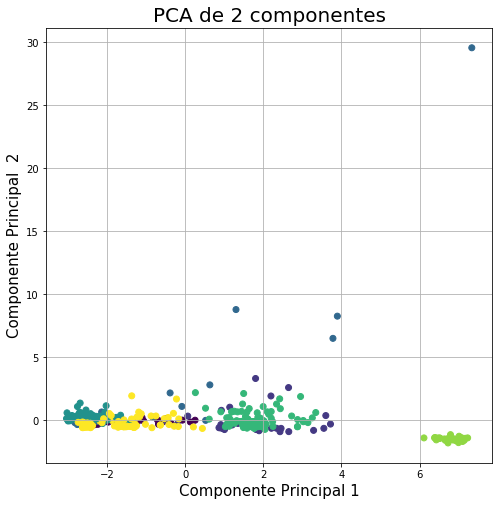

In [144]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal  2', fontsize = 15)
ax.set_title('PCA de 2 componentes', fontsize = 20)


plt.scatter(x_pca[:,0],x_pca[:,1], c=data['clase'])

ax.grid()

## Detección de outliers

In [145]:
import seaborn as sns

pca_df_o = pd.concat([pca_dataframe, data[['clase']]], axis = 1);
pca_df_o

,PC1,PC2,PC3,PC4,clase
0,-2.299677,-0.343837,-1.036211,-0.321205,0
1,-2.371925,-0.403867,-1.035717,0.123448,0
2,-2.389590,-0.266572,-0.770185,-0.495633,0
3,-2.514506,-0.096834,-0.574882,-1.135091,0
4,-2.236746,-0.124341,-0.914775,-1.225178,0
...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,6
416,-2.480510,-0.440099,-0.668901,0.515578,6
417,-1.262135,-0.478888,-2.066865,-0.002415,6
418,-1.403244,-0.494110,-2.024198,-0.459423,6


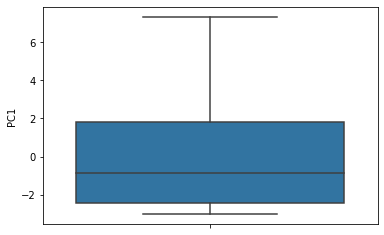

In [134]:
sns.boxplot(y = pca_df_o['PC1'])

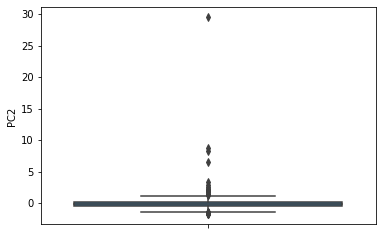

In [135]:
sns.boxplot(y = pca_df_o['PC2'])

In [136]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [137]:
lowerbound,upperbound = outlier_treatment(pca_df_o.PC2)
print(lowerbound, upperbound)

-1.4671932005127526 1.1785539827654923


In [138]:
pca_df_o[(pca_df_o.PC2 < lowerbound) | (pca_df_o.PC2 > upperbound)]

,PC1,PC2,PC3,PC4,clase
30,7.088319,-1.560816,0.933489,-1.622191,5
31,6.653630,-1.589645,0.458377,-1.506899,5
32,6.754232,-1.498079,0.631404,-2.049590,5
34,7.097352,-1.683036,0.529799,-0.910151,5
35,7.072242,-1.571110,0.908307,-1.634129,5
36,6.902150,-1.486911,1.315006,-1.448711,5
43,6.851001,-1.565639,0.440420,-1.600902,5
44,6.424831,-1.556289,0.085521,-1.033988,5
45,7.027830,-1.539067,0.917113,-1.589608,5
46,6.724713,-1.799339,1.329729,-1.380902,5


In [139]:
final_df = pca_df_o

final_df.drop(
    final_df[
        (final_df.PC2 > upperbound) | (final_df.PC2 < lowerbound) 
    ].index , inplace=True
)

In [140]:
final_df[(final_df.PC2 < lowerbound) | (final_df.PC2 > upperbound)]

,PC1,PC2,PC3,PC4,clase


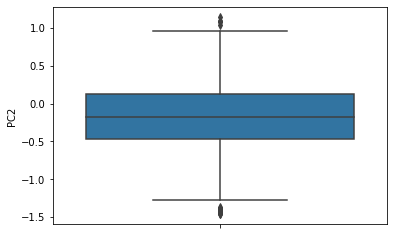

In [98]:
sns.boxplot(y = final_df['PC2'])

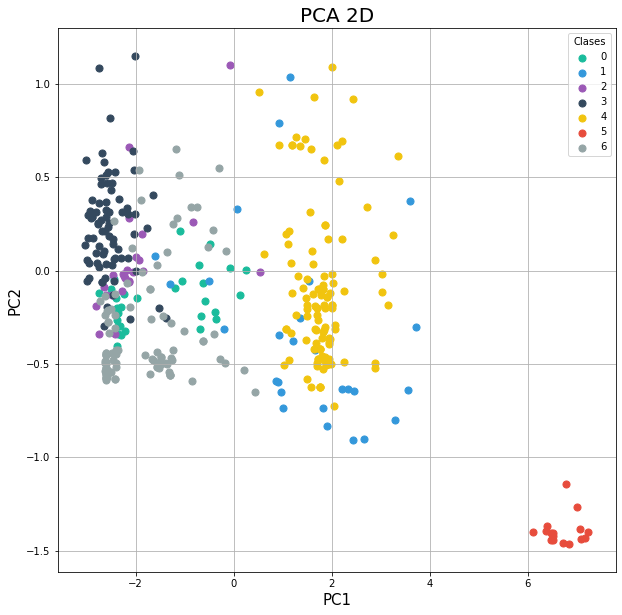

In [142]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA 2D', fontsize = 20)


targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['#1abc9c', '#3498db', '#9b59b6', '#34495e', '#f1c40f', '#e74c3c', '#95a5a6']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['clase'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets, title="Clases")
ax.grid()

## Clasificador

In [146]:
#dataframe = pd.DataFrame(data = x_estandarizada, columns = nombres_atributos)
#dataframe = pd.concat([dataframe, data[['clase']]], axis = 1);
dataframe = final_df

X = dataframe.drop('clase', 1)
y = dataframe['clase']

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [149]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("arbol")

'arbol.pdf'

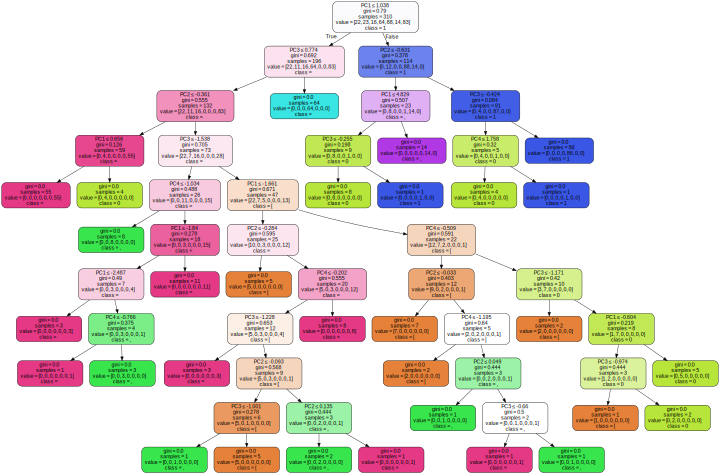

In [151]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=atributos,  
                      class_names= str(targets),  
                      filled=True, rounded=True,  
                      special_characters=True) 


pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')

gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [152]:
y_pred = clf.predict(X_test)

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Matriz de confusión: 
[[ 5  0  2  0  0  0  1]
 [ 0  4  0  0  0  0  0]
 [ 1  0  3  0  0  0  4]
 [ 0  0  0 13  0  0  0]
 [ 0  2  0  2 21  0  0]
 [ 0  0  0  0  0  2  0]
 [ 1  0  1  0  0  0 16]]
Accuracy: 0.8205128205128205


# Análisis